In [1]:
import importlib
import versDV as dv
import deviatoire as dev
from math import pi, sin, cos
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(dv)
importlib.reload(dev)

<module 'deviatoire' from '/root/DangVan/old/deviatoire.py'>

In [2]:

points1 = dv.nuage(100, 2*dv.pi, 0.01, 1)
points2 = dv.nuageOrt(100, 2*dv.pi, 0.01, 1)
    

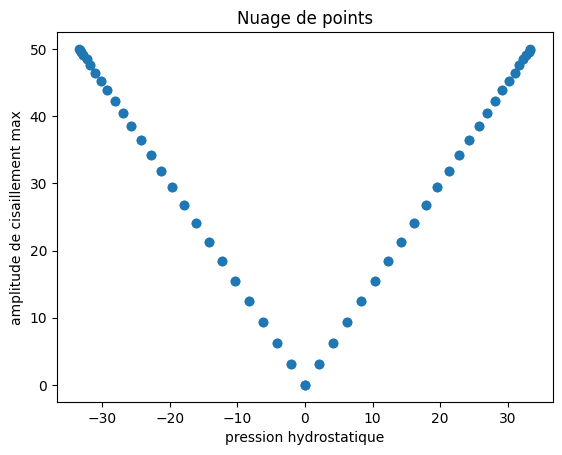

In [3]:
dv.traceNuage(points1)

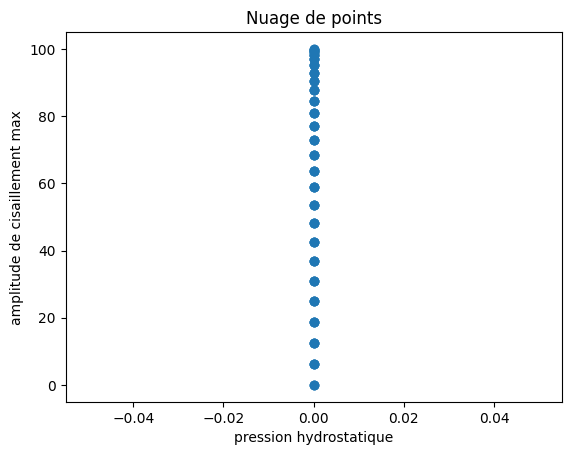

In [4]:
dv.traceNuage(points2)


In [5]:
matTens=dv.load_tens_from_csv('./datas/tensors_uniaxial.csv')
matDev=dev.CalculMatDev(matTens)


In [6]:
dv.hydro(matTens[0]),matTens[0]

(33.333333333333336, array([100.,   0.,   0.,   0.,   0.,   0.]))

In [7]:
dev.deviateur(matTens[0])


array([ 66.66666667, -33.33333333,   0.        ,   0.        ,
         0.        ])

In [8]:
dev.diametre(matTens)

(200.0,
 array([ 66.66666667, -33.33333333,   0.        ,   0.        ,
          0.        ]),
 array([-66.66666667,  33.33333333,   0.        ,   0.        ,
          0.        ]))

In [9]:
Rec,centre=dev.recentre(matTens)
pointsJ2=np.array([dev.normeJ2(Rec[i]) for i in range(Rec.shape[0])]).T
pointsTresca=np.array([dev.normeTresca(Rec[i]) for i in range(Rec.shape[0])]).T
# points3= np.vstack((points3, dv.hydro(Rec)))

points4=np.array([dv.hydro(matTens[i]) for i in range(matTens.shape[0])]).T


In [10]:
centre


array([0., 0., 0., 0., 0.])

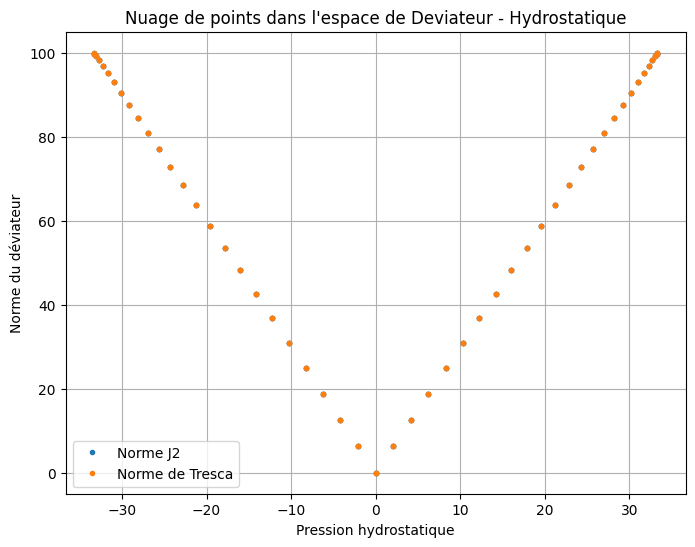

In [11]:
plt.figure(figsize=(8,6))
plt.plot(points4, pointsJ2,'.',label="Norme J2")
plt.plot(points4, pointsTresca,'.',label="Norme de Tresca")
plt.legend()
plt.ylabel("Norme du déviateur")
plt.xlabel("Pression hydrostatique")
plt.title("Nuage de points dans l'espace de Deviateur - Hydrostatique")
plt.grid()
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


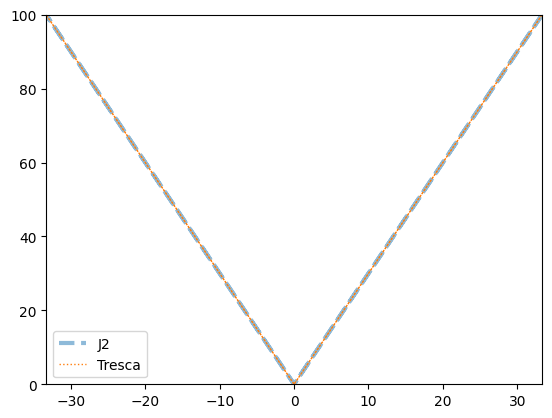

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ln, = ax.plot([], [], '--', label='J2',linewidth=3)
ln1, = ax.plot([], [], ':', label='Tresca',linewidth=1)

def init():
    ax.set_xlim(points4.min(), points4.max())
    ax.set_ylim(min(pointsJ2.min(), pointsTresca.min()), max(pointsJ2.max(), pointsTresca.max()))
    ln.set_alpha(.5)
    ln1.set_alpha(1)
    ax.legend()
    return ln, ln1


def update(frame):
    xdata = points4[:frame]
    ydata = pointsJ2[:frame]
    ln.set_data(xdata, ydata)
    ydata_t = pointsTresca[:frame]
    ln1.set_data(xdata, ydata_t)
    return ln, ln1
ani = FuncAnimation(fig, update, frames=range(1, len(points4)+1),
                    init_func=init, blit=False)
ani.save("test.gif")
